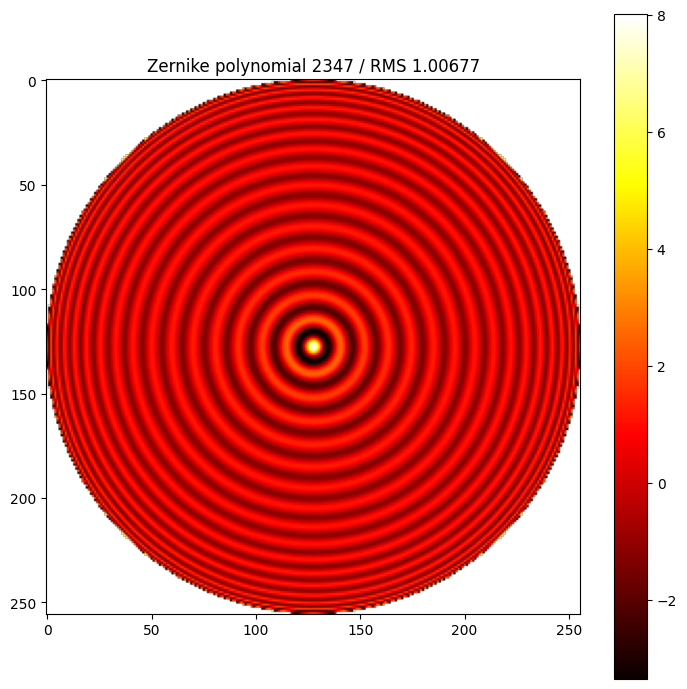

In [1]:
#%%
import matplotlib.pyplot as plt
from arte.types.mask import CircularMask
from arte.utils.zernike_generator import ZernikeGenerator

#%%
zz = ZernikeGenerator(CircularMask((256,256)))
n=2347
#n=352
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.imshow(zz.getZernike(n), cmap='hot' )
plt.colorbar()
plt.title('Zernike polynomial %d / RMS %g' % (n, zz.getZernike(n).std()))
plt.tight_layout()
plt.show()

total masked points: 7860 
(70, 120) 50


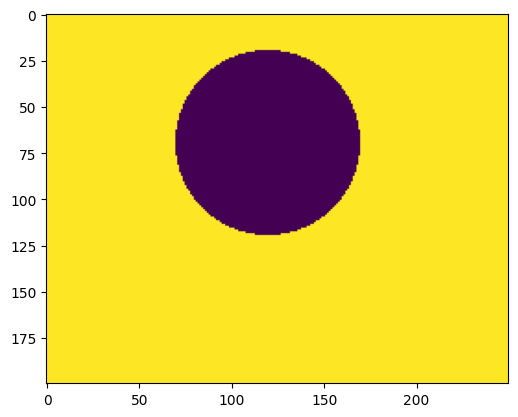

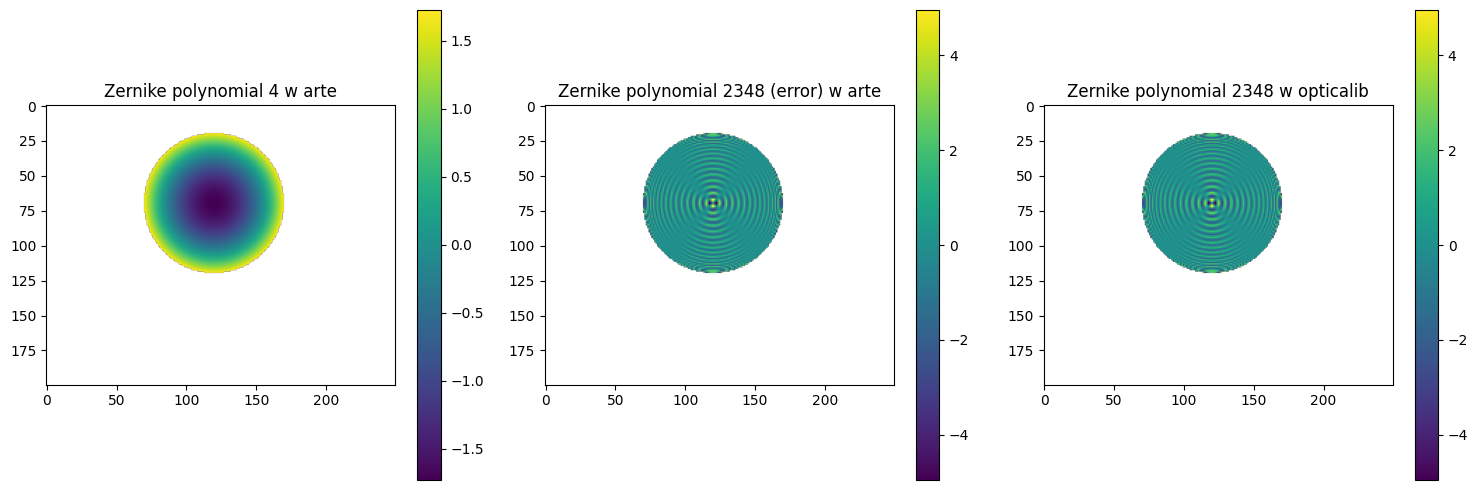

1.006017512063382
1.0060175120633819
(7860, 2400)


In [2]:
import matplotlib.pyplot as plt
from arte.types.mask import CircularMask
from arte.utils.zernike_generator import ZernikeGenerator
import numpy as np
import numpy.ma as ma
from opticalib.ground import zernike as zlib
cm = CircularMask((200,250),50,(70,120))
#cm = CircularMask((128,128), 50, (64,64))
plt.figure()
plt.imshow(cm.mask())
print("total masked points: %d " % np.sum(cm.mask()==0))
nzern = 36
zz = ZernikeGenerator(cm)
print(zz.center(), zz.radius())
img = zz.getZernike(4)
#coeff, mat = zlib.zernikeFit(img,  np.arange(2400)+1)
xx, yy = zz.cartesian_coordinates()
mm = cm.mask() == 0
mat = zlib._getZernike(xx[mm], yy[mm], np.arange(2400)+1)
sel =  2347+1
z2348 = img.data * 0.0
z2348[cm.mask()==0] = mat[:,sel-1]
z2348 = np.ma.masked_array(z2348, mask=cm.mask())
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(img)
plt.title('Zernike polynomial 4 w arte')
plt.colorbar()
plt.subplot(132)
plt.imshow(zz.getZernike(sel))
plt.title('Zernike polynomial %d (error) w arte' %sel)
plt.colorbar()
plt.subplot(133)
plt.imshow(z2348)
plt.title('Zernike polynomial %d w opticalib' %sel)
plt.colorbar()
plt.tight_layout()
plt.show()

print(zz.getZernike(sel).std())
print(np.std(mat[:,sel-1]))
print(mat.shape)

Image data shape: (200, 250)


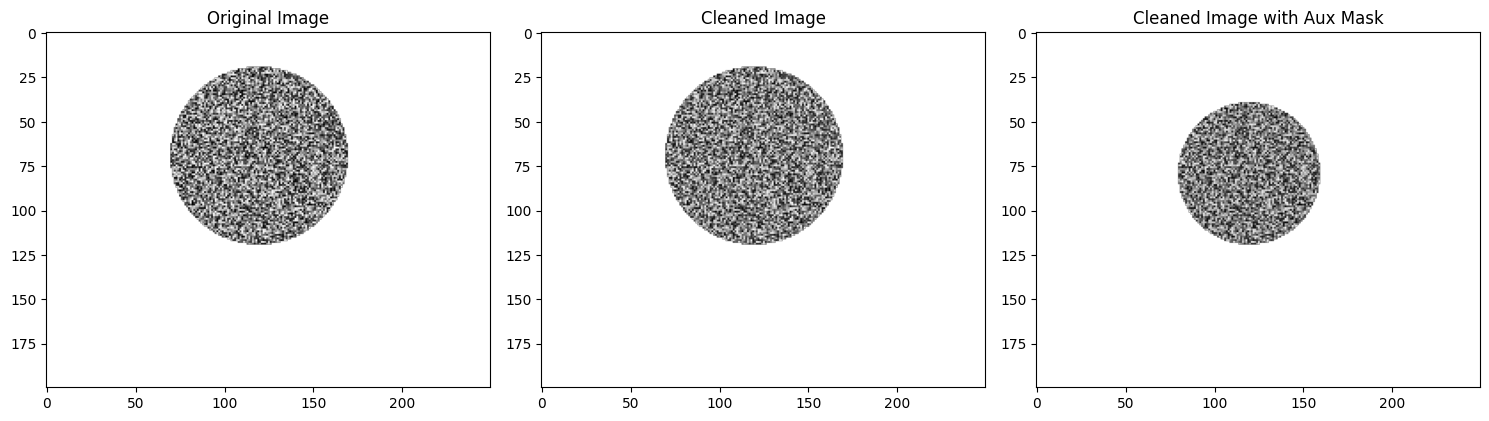

In [3]:
from opticalib.ground import zernike
import numpy as np

# Create a sample image with a mask
image_data = np.random.random(cm.mask().shape)
print("Image data shape:", image_data.shape)
mask = cm.mask()
masked_image = ma.masked_array(image_data, mask=mask)
# Define Zernike modes to be removed
zernike_modes = np.arange(30)+1
# Remove Zernike modes from the image
cleaned_image = zernike.removeZernike(masked_image, zernike_modes)
caux = CircularMask((200, 250), 40, (80, 120))

cleaned_image2 = zernike.removeZernikeAuxMask(masked_image, caux.mask()==0, zernike_modes)
# Display the original and cleaned images
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title("Original Image")
plt.imshow(masked_image, cmap='gray')
plt.subplot(132)
plt.title("Cleaned Image")
plt.imshow(cleaned_image, cmap='gray')
plt.subplot(133)
plt.title("Cleaned Image with Aux Mask")
plt.imshow(cleaned_image2, cmap='gray')
plt.tight_layout()
plt.show()